In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

from sklearn import datasets
from sklearn.model_selection import train_test_split

# Linear Regression

Approximate the linear function that best represents a given set of continuous sample points.    
pred = w * x + b    
where w is the slope and b is the bias  

### Cost functions

In [302]:
# Mean absolute error
def mae(y, pred):
    """
    The mean of the absolute error between y and the predicted.
    """
    mae = ( np.sum([abs(t-p) for t,p in zip(y, pred)]) / len(pred) )
    return np.round(mae, 4)

# Mean squared error
def mse(y, pred):
    """
    The mean squared error between y and the predicted.
    This metric penalizes larger errors more than MAE but due to the quadratic the error (unit^2) cannot be directly compared to the target (unit).
    This same property means that the metric can be more affected by outliers.
    """
    mse = ( np.sum([np.square(t-p) for t,p in zip(y, pred)]) / len(pred) )
    return np.round(mse, 4)

#Root mean squared error
def rmse(y, pred):
    """
    The root of the mean of the squared error between y and the predicted.
    While larger errors are still penalized, using the root allows a better interpretability/comparison to the target (unit).
    Also more susceptible to give outliers more importance.
    """
    rmse = np.sqrt( np.sum([np.square(t-p) for t,p in zip(y, pred)]) / len(pred) )
    return np.round(rmse, 4)

#Root mean squared logarithmic error
def rmsle(y, pred):
    """
    The root of the mean of the squared log(error) between y and the predicted.
    mainly used when predictions have large deviations (0 - millions) and we don't want to punish deviations in prediction as much as with MSE.
    """
    errors = [np.square( np.log1p(t) - np.log1p(p) ) for t,p in zip(y, pred)]
    rmsle= np.sqrt( np.sum(errors) / len(pred) )
    return np.round(rmsle, 4)

### Gradient descent

The iterative process of using gradients to determine which direction the (at least local) minimum is and updating the weights to move in that direction.

w = w - a * dw (weight - learning rate * derivative of weight)       
dw = 1/N sum_n( 2xi * (pred - yi))   


b = b - a * db (bias - learning rate * derivative of bias)    
db = 1/N sum_n( 2 * (pred - yi))   

In [303]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    @property
    def lr(self):
        return self._lr
    
    @lr.setter
    def lr(self, lr):
        if not isinstance(lr, float) or lr < 0.0:
            raise ValueError("The learning rate should be a number above 0.")
        self._lr = lr

    @property
    def n_iter(self):
        return self._n_iter
    
    @n_iter.setter
    def n_iter(self, n_iter):
        if not isinstance(n_iter, int) or n_iter < 0:
            raise ValueError("The number of iterations should be a number above 0.")
        self._n_iter = n_iter

    def fit(self, X, y):
        # training with gradient descent
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iter):
            y_pred = np.dot(X,  self.weights) + self.bias
            errors =  y_pred - y
            db = (1 / n_samples) * np.sum(errors)
            dw = (1 / n_samples) * np.dot(X.T, errors)
            
            self.bias -= self.lr * db
            self.weights -= self.lr * dw
        

    def predict(self, X):
        # use the function resulting from training to predict for the sample
        return np.dot(X,  self.weights) + self.bias



In [304]:
# artificially made dataset to test class
X1, y1 = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1234)

In [305]:
reg1 = LinearRegression(lr=0.1, n_iter=100)
reg1.fit(X_train1, y_train1)
predicted1 = reg1.predict(X_test1)

rmse(y_test1, predicted1)

17.4864

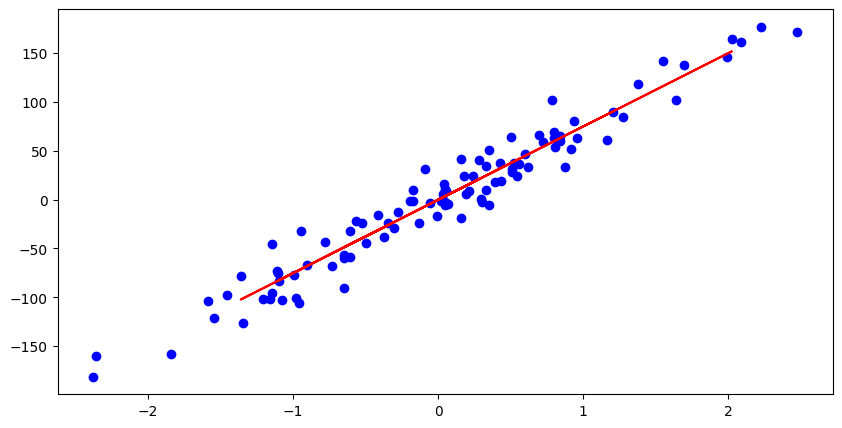

In [306]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X1, y1, color='b')
plt.plot(X_test1, predicted1, color='r', label="Prediction")
plt.show()

In [307]:
# artificially made dataset with 3 features to test class
X, y = datasets.make_regression(n_samples=200, n_features=3, noise=30, random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [309]:
reg2 = LinearRegression(lr=0.1, n_iter=100)
reg2.fit(X_train, y_train)
predicted2 = reg2.predict(X_test)

rmse(y, predicted2)

188.8923